<a href="https://colab.research.google.com/github/AvichalDwivedi2205/moonPath/blob/main/moonpath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install inference_sdk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.11.0.86
    Uninstalling opencv-python-4.11.0.86:
      Successfully uninstalled opencv-python-4.11.0.86
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.11.12
    Uninstalling aiohttp-3.11.12:
      Successfully uninstalled aiohttp-3.11.12


In [ ]:
from google.colab import files

# This will prompt you to upload a file
uploaded = files.upload()

Saving image.jpg to image.jpg


In [ ]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="218UpwuQTzvCcrDilyeC"  # Replace with your actual API key
)

# Use the file name of the uploaded image
result = CLIENT.infer("image.jpg", model_id="lunar-crater-detection-2/2")
print(result)

{'inference_id': 'c719ecdf-6dc6-421b-ae76-ea763518c8c7', 'time': 0.04409868199945777, 'image': {'width': 735, 'height': 733}, 'predictions': [{'x': 132.5, 'y': 243.0, 'width': 49.0, 'height': 52.0, 'confidence': 0.8226547241210938, 'class': 'crater', 'class_id': 0, 'detection_id': '6a55f3bb-3980-4fbe-85e5-d2b6c4faa3ac'}, {'x': 360.0, 'y': 390.5, 'width': 38.0, 'height': 41.0, 'confidence': 0.7944216728210449, 'class': 'crater', 'class_id': 0, 'detection_id': 'f02524bd-cb4f-4d89-8047-6a4530689add'}, {'x': 566.5, 'y': 271.0, 'width': 63.0, 'height': 64.0, 'confidence': 0.7919301986694336, 'class': 'crater', 'class_id': 0, 'detection_id': '3c8c0d8c-83e3-4a34-b411-1e91e5412009'}, {'x': 481.5, 'y': 580.5, 'width': 45.0, 'height': 43.0, 'confidence': 0.699580192565918, 'class': 'crater', 'class_id': 0, 'detection_id': '2ca91ced-d61d-4d02-bde2-61a1b6cd10f3'}, {'x': 181.5, 'y': 600.0, 'width': 41.0, 'height': 40.0, 'confidence': 0.6779206395149231, 'class': 'crater', 'class_id': 0, 'detection_

In [ ]:
result['image']

{'width': 735, 'height': 733}

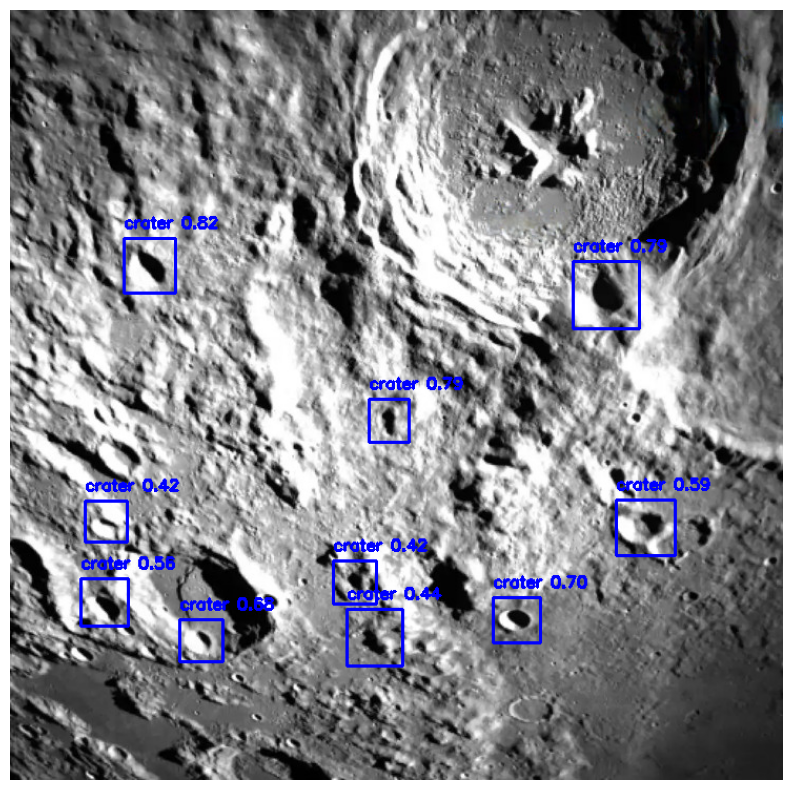

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image (ensure the file is in your working directory)
img = cv2.imread("image.jpg")
# Convert image from BGR (OpenCV default) to RGB (for matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Inference result (replace this with your actual result dictionary)
result = {
    'inference_id': '08d4f76a-3d45-470d-8949-6d8dc8b1db39',
    'time': 0.039092795999749796,
    'image': result['image'],
    'predictions': result['predictions']
}

# Loop through each prediction and draw bounding boxes with labels
for pred in result['predictions']:
    # The provided x, y are assumed to be the center coordinates.
    x_center, y_center = pred['x'], pred['y']
    width, height = pred['width'], pred['height']
    # Calculate top-left and bottom-right coordinates
    x_min = int(x_center - width / 2)
    y_min = int(y_center - height / 2)
    x_max = int(x_center + width / 2)
    y_max = int(y_center + height / 2)

    # Draw rectangle (blue color, thickness of 2)
    cv2.rectangle(img_rgb, (x_min, y_min), (x_max, y_max), color=(0, 0, 255), thickness=2)

    # Create label text with class and confidence (rounded to 2 decimal places)
    label = f"{pred['class']} {pred['confidence']:.2f}"
    # Put text above the rectangle
    cv2.putText(img_rgb, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the resulting image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd
data = []
for pred in result['predictions']:
    data.append({
        'x': pred['x'],
        'y': pred['y'],
        'width': pred['width'],
        'height': pred['height'],
        'confidence': pred['confidence'],
        'class': pred['class'],
        'class_id': pred['class_id']
    })
df = pd.DataFrame(data)
df


,x,y,width,height,confidence,class,class_id
0,132.5,243.0,49.0,52.0,0.8227,crater,0
1,360.0,390.5,38.0,41.0,0.7944,crater,0
2,566.5,271.0,63.0,64.0,0.7919,crater,0
3,481.5,580.5,45.0,43.0,0.6996,crater,0
4,181.5,600.0,41.0,40.0,0.6779,crater,0
5,604.0,492.5,56.0,53.0,0.5893,crater,0
6,89.5,563.5,45.0,45.0,0.5593,crater,0
7,346.5,597.0,53.0,54.0,0.4417,crater,0
8,91.0,486.5,40.0,39.0,0.4220,crater,0
9,327.5,544.5,41.0,41.0,0.4202,crater,0


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="218UpwuQTzvCcrDilyeC")
project = rf.workspace("titaniumsv5").project("chandrayaan-2-ohrc-lunar-crater-dataset")
version = project.version(4)
dataset = version.download("yolov9")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chandrayaan-2-OHRC-Lunar-Crater-Dataset-4 in yolov9:: 100%|██████████| 127/127 [00:00<00:00, 4545.84it/s]


In [ ]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="218UpwuQTzvCcrDilyeC"  # Replace with your actual API key
)

# Use the file name of the uploaded image
result = CLIENT.infer("/content/train/images/100_jpg.rf.efb4b46e3134cbceabf12a6d540b3cbd.jpg", model_id="lunar-crater-detection-2/2")
print(result)

{'inference_id': '23aaac61-7ee6-42c4-a06c-3424d6ea1c52', 'time': 0.03700456300066435, 'image': {'width': 640, 'height': 373}, 'predictions': [{'x': 236.0, 'y': 76.0, 'width': 72.0, 'height': 66.0, 'confidence': 0.8843512535095215, 'class': 'crater', 'class_id': 0, 'detection_id': '3c8b6b9c-84d3-4ab0-9ea2-7c6fc49256e6'}, {'x': 490.0, 'y': 345.0, 'width': 22.0, 'height': 14.0, 'confidence': 0.8523148894309998, 'class': 'crater', 'class_id': 0, 'detection_id': '03da92ab-85d4-4909-b25e-f412a565bd6a'}, {'x': 77.5, 'y': 119.5, 'width': 31.0, 'height': 25.0, 'confidence': 0.844017505645752, 'class': 'crater', 'class_id': 0, 'detection_id': 'c28e24e8-4c93-4bca-9d00-a07f5201b6fa'}, {'x': 488.5, 'y': 284.0, 'width': 23.0, 'height': 20.0, 'confidence': 0.8425315022468567, 'class': 'crater', 'class_id': 0, 'detection_id': '8cb48619-05ed-4d9a-a079-878bafaca959'}, {'x': 606.0, 'y': 28.0, 'width': 18.0, 'height': 12.0, 'confidence': 0.8223831057548523, 'class': 'crater', 'class_id': 0, 'detection_id'

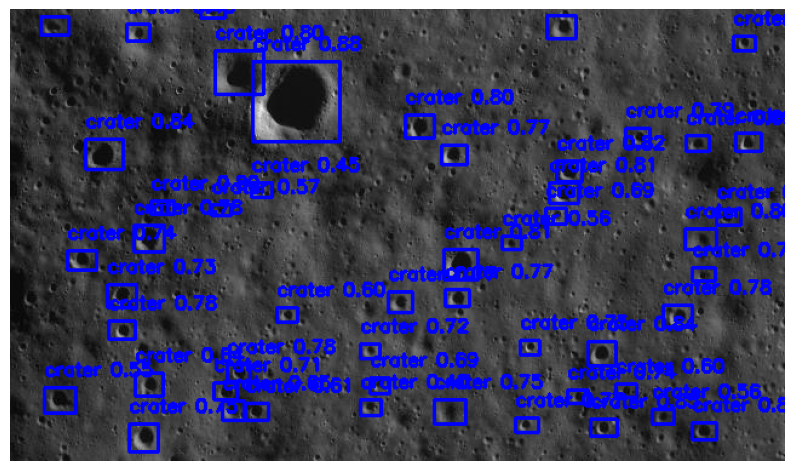

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image (ensure the file is in your working directory)
img = cv2.imread("/content/train/images/100_jpg.rf.efb4b46e3134cbceabf12a6d540b3cbd.jpg")
# Convert image from BGR (OpenCV default) to RGB (for matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Inference result (replace this with your actual result dictionary)
result = {
    'inference_id': '08d4f76a-3d45-470d-8949-6d8dc8b1db39',
    'time': 0.039092795999749796,
    'image': result['image'],
    'predictions': result['predictions']
}

# Loop through each prediction and draw bounding boxes with labels
for pred in result['predictions']:
    # The provided x, y are assumed to be the center coordinates.
    x_center, y_center = pred['x'], pred['y']
    width, height = pred['width'], pred['height']
    # Calculate top-left and bottom-right coordinates
    x_min = int(x_center - width / 2)
    y_min = int(y_center - height / 2)
    x_max = int(x_center + width / 2)
    y_max = int(y_center + height / 2)

    # Draw rectangle (blue color, thickness of 2)
    cv2.rectangle(img_rgb, (x_min, y_min), (x_max, y_max), color=(0, 0, 255), thickness=2)

    # Create label text with class and confidence (rounded to 2 decimal places)
    label = f"{pred['class']} {pred['confidence']:.2f}"
    # Put text above the rectangle
    cv2.putText(img_rgb, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the resulting image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


Processing /content/train/images/100_jpg.rf.efb4b46e3134cbceabf12a6d540b3cbd.jpg...
Processing /content/train/images/13_jpg.rf.5178f1551e33147e180781feccdae03d.jpg...
Processing /content/train/images/14_jpg.rf.eaf17bb886ffc80b08fed4d707d964a0.jpg...
Processing /content/train/images/17_jpg.rf.8651f0005258921c54c3a6b340997f0a.jpg...
Processing /content/train/images/18_jpg.rf.b1638a0575d9659ee7178296c94e0e30.jpg...
Processing /content/train/images/19_jpg.rf.e62ff00b8f0c28fd8ff53c069c771533.jpg...
Processing /content/train/images/22_jpg.rf.1246bcbdd119fb7b25fa38299d9cffa9.jpg...
Processing /content/train/images/26_jpg.rf.a22530876a6bb305c53d8bf9c673d0e5.jpg...
Processing /content/train/images/28_jpg.rf.d57cc98e89aff46058005ecee29805b0.jpg...
Processing /content/train/images/2_jpg.rf.0ffdaf7fc98b8a0a16a3f00c88bb7faa.jpg...
Processing /content/train/images/30_jpg.rf.89e64da231c072c64732ce23da385601.jpg...
Processing /content/train/images/32_jpg.rf.417e319fee8bb08953a034d8ae4fbbb4.jpg...
Proc

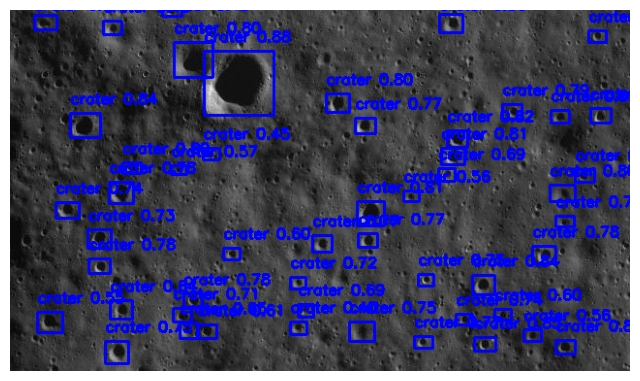

In [ ]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from inference_sdk import InferenceHTTPClient

# Initialize the inference client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="218UpwuQTzvCcrDilyeC"  # Replace with your actual API key
)

def process_images(train_images_dir, valid_images_dir, output_folder="crator_images", model_id="lunar-crater-detection-2/2"):
    """
    Processes images from the train and valid directories:
      - Runs inference on each image using the Roboflow client.
      - Draws bounding boxes and labels on each image.
      - Saves the processed image into the output folder.
      - Records the inference result in a dataframe.

    Args:
        train_images_dir (str): Path to the 'images' folder inside the train folder.
        valid_images_dir (str): Path to the 'images' folder inside the valid folder.
        output_folder (str): Folder where processed images will be saved.
        model_id (str): The model identifier used for inference.

    Returns:
        pd.DataFrame: DataFrame with columns 'image_path' and 'inference_result'.
                      The ordering of the DataFrame corresponds to the order in which images were processed.
    """

    # Create the output folder if it does not exist
    os.makedirs(output_folder, exist_ok=True)

    # Create lists to hold the results and the paths of the output images
    results_list = []
    output_image_paths = []

    # Helper function to list valid image files from a directory
    def list_images(folder):
        valid_extensions = ('.png', '.jpg', '.jpeg')
        return sorted([
            os.path.join(folder, img) for img in os.listdir(folder)
            if img.lower().endswith(valid_extensions)
        ])

    # Get image paths from both directories
    train_images = list_images(train_images_dir)
    valid_images = list_images(valid_images_dir)

    # Process train images first, then valid images
    all_images = train_images + valid_images

    for img_path in all_images:
        print(f"Processing {img_path}...")

        # Run inference using the Roboflow API
        try:
            result = CLIENT.infer(img_path, model_id=model_id)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            continue

        # Read the image using OpenCV
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Unable to read image {img_path}")
            continue

        # Convert image from BGR (default in OpenCV) to RGB (for drawing and matplotlib)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Loop through predictions and draw bounding boxes with labels
        for pred in result.get('predictions', []):
            # Calculate top-left and bottom-right coordinates from the center coordinates
            x_center, y_center = pred['x'], pred['y']
            width, height = pred['width'], pred['height']
            x_min = int(x_center - width / 2)
            y_min = int(y_center - height / 2)
            x_max = int(x_center + width / 2)
            y_max = int(y_center + height / 2)

            # Draw rectangle (using red color; note that (0, 0, 255) is red in RGB)
            cv2.rectangle(img_rgb, (x_min, y_min), (x_max, y_max), color=(0, 0, 255), thickness=2)

            # Create label with class and confidence
            label = f"{pred['class']} {pred['confidence']:.2f}"
            cv2.putText(img_rgb, label, (x_min, max(y_min - 10, 0)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # Prepare the output path and save the processed image.
        base_name = os.path.basename(img_path)
        output_path = os.path.join(output_folder, base_name)

        # cv2.imwrite expects BGR, so convert back from RGB
        img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
        cv2.imwrite(output_path, img_bgr)

        # Append results to the lists
        results_list.append(result)
        output_image_paths.append(output_path)

    # Create a DataFrame with the collected results
    df = pd.DataFrame({
        'image_path': output_image_paths,
        'inference_result': results_list
    })

    return df

# Example usage:
# Define the paths to your train and valid images folders.
train_dir = "/content/train/images"
valid_dir = "/content/valid/images"

# Process the images and get the results DataFrame.
df_results = process_images(train_dir, valid_dir)

# Display the first few rows of the DataFrame.
print(df_results.head())

# Optionally, display one of the processed images using matplotlib:
sample_image_path = df_results.iloc[0]['image_path']
sample_img = cv2.imread(sample_image_path)
sample_img_rgb = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(sample_img_rgb)
plt.axis('off')
plt.show()


In [ ]:
import math
import heapq
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def create_occupancy_grid(image_path, predictions):
    """
    Create a 2D occupancy grid (H x W) for the given image,
    marking crater bounding boxes as blocked (1).
    """
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Cannot load image: {image_path}")
    H, W, _ = img.shape

    # 0 = free, 1 = blocked
    occupancy_grid = np.zeros((H, W), dtype=np.uint8)

    for pred in predictions:
        x_center = pred['x']
        y_center = pred['y']
        w = pred['width']
        h = pred['height']

        # Convert to integer pixel coords
        x_min = int(x_center - w / 2)
        x_max = int(x_center + w / 2)
        y_min = int(y_center - h / 2)
        y_max = int(y_center + h / 2)

        # Clip to image boundaries
        x_min = max(0, x_min)
        x_max = min(W - 1, x_max)
        y_min = max(0, y_min)
        y_max = min(H - 1, y_max)

        occupancy_grid[y_min:y_max+1, x_min:x_max+1] = 1

    return occupancy_grid


In [ ]:
def plan_rover_path_avoid_craters_a_star(
    image_path,
    predictions,
    path_length_m=100,      # desired path length (meters)
    num_stops=10,           # how many stops to place along the route
    real_width_m=600,       # width of the image in meters
    real_height_m=150       # height of the image in meters
):
    """
    Plans a path using A* to reach >= path_length_m from the start,
    avoiding crater bounding boxes.

    Returns:
      annotated_img (RGB)   -> The image with the path drawn on it
      path_coords (list)    -> List of (x, y) pixel coordinates from start to end
      stops (list)          -> List of (x, y) pixel coordinates for stops
    """
    # --- Load image ---
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        print(f"[ERROR] Cannot load image: {image_path}")
        return None, None, None
    H, W, _ = img_bgr.shape
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # --- Occupancy grid (0=free, 1=blocked) ---
    occupancy_grid = create_occupancy_grid(image_path, predictions)

    # --- Scale factors: pixel -> meters ---
    scale_x = real_width_m / float(W)
    scale_y = real_height_m / float(H)

    # --- Choose a landing spot (start) on the left, near center ---
    start_x = int(0.1 * W)
    start_y = H // 2

    # If blocked, try shifting up/down a bit (simple fallback)
    if occupancy_grid[start_y, start_x] == 1:
        found_free = False
        for offset in range(1, H // 2):
            for sign in [+1, -1]:
                test_y = start_y + sign * offset
                if 0 <= test_y < H and occupancy_grid[test_y, start_x] == 0:
                    start_y = test_y
                    found_free = True
                    break
            if found_free:
                break
        if not found_free:
            print("[ERROR] No free landing spot found near left edge.")
            return None, None, None

    # Helper to compute distance in meters between two pixel coords
    def dist_m(px1, py1, px2, py2):
        dx = (px2 - px1) * scale_x
        dy = (py2 - py1) * scale_y
        return math.sqrt(dx*dx + dy*dy)

    # --- A* Data Structures ---
    # g_map[y, x] = best known distance from start in meters
    g_map = np.full((H, W), np.inf, dtype=np.float32)
    g_map[start_y, start_x] = 0.0

    # predecessor[y, x] = (py, px) to reconstruct path
    predecessor = np.full((H, W, 2), -1, dtype=np.int32)

    # min-heap of (f, x, y), where f = g + h
    # h(n) = max(0, path_length_m - dist_m(n, start))
    # so that once dist_m(n, start) >= path_length_m, h=0
    def heuristic(px, py):
        d = dist_m(start_x, start_y, px, py)
        if d >= path_length_m:
            return 0.0
        else:
            return path_length_m - d

    open_set = []
    start_h = heuristic(start_x, start_y)  # typically ~100 if start distance=0
    heapq.heappush(open_set, (start_h, start_x, start_y))

    # We'll expand in 8 directions
    neighbors_8 = [(-1, 0), (1, 0), (0, -1), (0, 1),
                   (-1, -1), (-1, 1), (1, -1), (1, 1)]

    # For safety, set a max expansions to prevent infinite loops
    max_expansions = W * H
    expansions_count = 0

    path_found = False
    goal_x, goal_y = None, None

    while open_set and expansions_count < max_expansions:
        expansions_count += 1

        f, cx, cy = heapq.heappop(open_set)

        # If the entry is stale, skip
        if f > g_map[cy, cx] + heuristic(cx, cy):
            continue

        # Check if we've reached >= 100m from start
        if dist_m(start_x, start_y, cx, cy) >= path_length_m:
            path_found = True
            goal_x, goal_y = cx, cy
            break

        # Expand neighbors
        for dx, dy in neighbors_8:
            nx, ny = cx + dx, cy + dy
            if 0 <= nx < W and 0 <= ny < H:
                if occupancy_grid[ny, nx] == 1:
                    continue  # blocked

                step_cost = dist_m(cx, cy, nx, ny)
                new_g = g_map[cy, cx] + step_cost
                if new_g < g_map[ny, nx]:
                    g_map[ny, nx] = new_g
                    predecessor[ny, nx] = [cy, cx]
                    new_f = new_g + heuristic(nx, ny)
                    heapq.heappush(open_set, (new_f, nx, ny))

    if not path_found:
        print("[INFO] No path of >= 100m found from the start. Try adjusting parameters.")
        return None, None, None

    # --- Reconstruct path from (goal_x, goal_y) to start ---
    path_coords = []
    py, px = goal_y, goal_x
    while True:
        path_coords.append((px, py))
        ppy, ppx = predecessor[py, px]
        if ppy == -1 or ppx == -1:
            break
        py, px = ppy, ppx

    path_coords.reverse()  # from start to end

    # --- Place stops at uniform intervals along the path ---
    total_dist = 0.0
    stops = []
    if len(path_coords) > 1:
        interval = dist_m(start_x, start_y, goal_x, goal_y) / (num_stops + 1)
        dist_since_last_stop = 0.0
        prev_x, prev_y = path_coords[0]
        stops_collected = 0

        for i in range(1, len(path_coords)):
            cur_x, cur_y = path_coords[i]
            step_m = dist_m(prev_x, prev_y, cur_x, cur_y)
            dist_since_last_stop += step_m
            total_dist += step_m

            # place a stop whenever we pass the interval threshold
            while dist_since_last_stop >= interval and stops_collected < num_stops:
                overshoot = dist_since_last_stop - interval
                frac = 1.0 - overshoot / step_m if step_m > 0 else 0
                stop_x = int(prev_x + frac * (cur_x - prev_x))
                stop_y = int(prev_y + frac * (cur_y - prev_y))
                stops.append((stop_x, stop_y))

                stops_collected += 1
                dist_since_last_stop -= interval

            prev_x, prev_y = cur_x, cur_y

    # --- Draw the path ---
    annotated_img = img_rgb.copy()

    # Draw path as a series of line segments
    for i in range(len(path_coords) - 1):
        x1, y1 = path_coords[i]
        x2, y2 = path_coords[i+1]
        cv2.line(annotated_img, (x1, y1), (x2, y2), (0, 255, 255), 2)

    # Draw start and end
    sx, sy = path_coords[0]
    cv2.circle(annotated_img, (sx, sy), 6, (0, 255, 0), -1)  # green start
    ex, ey = path_coords[-1]
    cv2.circle(annotated_img, (ex, ey), 6, (255, 0, 0), -1)  # blue end

    # Draw stops
    for (sx, sy) in stops:
        cv2.circle(annotated_img, (sx, sy), 3, (255, 0, 0), -1)

    return annotated_img, path_coords, stops


[INFO] No path of >= 100m found from the start. Try adjusting parameters.
No valid path found for crator_images/100_jpg.rf.efb4b46e3134cbceabf12a6d540b3cbd.jpg. Skipping.
[INFO] No path of >= 100m found from the start. Try adjusting parameters.
No valid path found for crator_images/26_jpg.rf.a22530876a6bb305c53d8bf9c673d0e5.jpg. Skipping.
[INFO] No path of >= 100m found from the start. Try adjusting parameters.
No valid path found for crator_images/32_jpg.rf.417e319fee8bb08953a034d8ae4fbbb4.jpg. Skipping.
[INFO] No path of >= 100m found from the start. Try adjusting parameters.
No valid path found for crator_images/62_jpg.rf.947b321b8bc4149c5ca6a944f8c907f2.jpg. Skipping.
[INFO] No path of >= 100m found from the start. Try adjusting parameters.
No valid path found for crator_images/7_jpg.rf.d893ef993a97b23476408c07c1eb6ce8.jpg. Skipping.
[INFO] No path of >= 100m found from the start. Try adjusting parameters.
No valid path found for crator_images/87_jpg.rf.48b19b6c9396827d13e2ab94729f

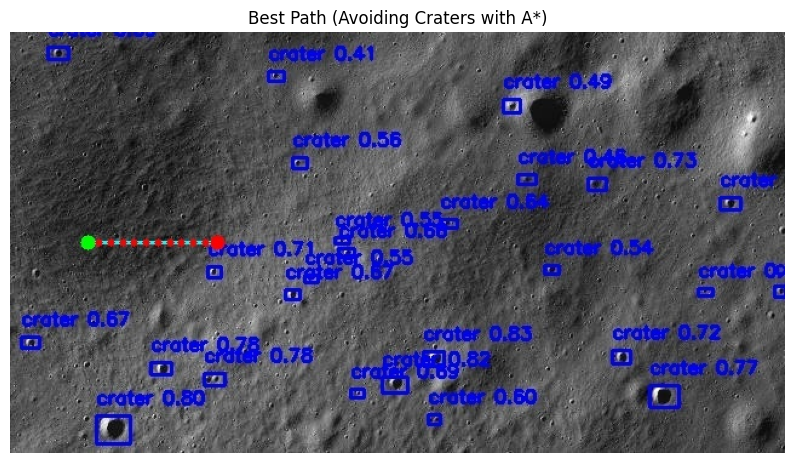

In [ ]:
def process_all_paths_avoiding_craters_a_star(df_results,
                                              all_paths_folder="all_paths_avoiding_craters",
                                              best_path_folder="best_path"):
    """
    For each image in df_results, plan a path >= 100m using A* that avoids crater bounding boxes.
    Save all annotated images, then pick the "best" image by crater coverage (lowest safety_score).
    """
    os.makedirs(all_paths_folder, exist_ok=True)
    os.makedirs(best_path_folder, exist_ok=True)

    records = []

    for idx, row in df_results.iterrows():
        image_path = row['image_path']
        preds = row['inference_result'].get("predictions", [])

        # Safety score: sum of crater areas
        safety_score = sum(p["width"] * p["height"] for p in preds)

        annotated_img, path_coords, stops = plan_rover_path_avoid_craters_a_star(
            image_path=image_path,
            predictions=preds,
            path_length_m=100,  # desired path length
            num_stops=10,
            real_width_m=600,   # adjust if needed
            real_height_m=150
        )

        if annotated_img is None:
            # Means no path found or error reading image
            print(f"No valid path found for {image_path}. Skipping.")
            continue

        # Save the annotated image
        base_name = os.path.basename(image_path)
        out_name = os.path.splitext(base_name)[0] + "_avoid_a_star.jpg"
        out_path = os.path.join(all_paths_folder, out_name)

        annotated_bgr = cv2.cvtColor(annotated_img, cv2.COLOR_RGB2BGR)
        cv2.imwrite(out_path, annotated_bgr)

        # Record info
        record = {
            "image_path": image_path,
            "annotated_image_path": out_path,
            "safety_score": safety_score,
            "path_length_pixels": len(path_coords),
            "landing_spot": path_coords[0] if path_coords else None,
            "end_spot": path_coords[-1] if path_coords else None,
            "stops": stops
        }
        records.append(record)

    # Create a DataFrame
    paths_df = pd.DataFrame(records)
    if len(paths_df) == 0:
        print("[INFO] No paths found for any image!")
        return None, None, None

    # Pick best image by crater coverage (lowest safety_score).
    best_idx = paths_df["safety_score"].idxmin()
    best_record = paths_df.loc[best_idx]

    # Copy best annotated image to best_path folder
    best_annotated_img = cv2.imread(best_record["annotated_image_path"])
    best_output_path = os.path.join(best_path_folder, "best_path.jpg")
    cv2.imwrite(best_output_path, best_annotated_img)

    return paths_df, best_record, best_output_path

paths_df, best_record, best_output_path = process_all_paths_avoiding_craters_a_star(df_results)
if paths_df is not None:
    print("All path details:\n", paths_df)
    print("\nBest path details:\n", best_record)
    # Display best path
    best_img_rgb = cv2.cvtColor(cv2.imread(best_output_path), cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(best_img_rgb)
    plt.title("Best Path (Avoiding Craters with A*)")
    plt.axis('off')
    plt.show()
